## Day 34 Lecture 2 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset describing TripAdvisor reviews for Las Vegas hotels loaded below and analyze the model generated for this dataset.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
vegas = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/LasVegasTripAdvisorReviews-Dataset.csv', sep=';')

In [103]:
vegas.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


Check for missing data and remove all rows with missing data

In [104]:
# answer below: 
vegas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    object
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

How many reviews do we have for each hotel in the dataset?

In [105]:
# answer below:
vegas.groupby(['Hotel name'])['Hotel name','Nr. reviews'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Hotel name,Nr. reviews
0,Bellagio Las Vegas,665
1,Caesars Palace,912
2,Circus Circus Hotel & Casino Las Vegas,701
3,Encore at wynn Las Vegas,1372
4,Excalibur Hotel & Casino,1094
5,Hilton Grand Vacations at the Flamingo,1162
6,Hilton Grand Vacations on the Boulevard,886
7,Marriott's Grand Chateau,2161
8,Monte Carlo Resort&Casino,1724
9,Paris Las Vegas,1229


We would like to predict the score variable. Examine the dataset and decide which columns should be turned into dummy variables and transform the data. Also, where we have two columns with redundant information, remove one of the two columns. Remove the hotel stars column.

In [113]:
vegas.columns

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Traveler type', 'Pool', 'Gym',
       'Tennis court', 'Spa', 'Casino', 'Free internet', 'Hotel name',
       'Hotel stars', 'Nr. rooms', 'User continent', 'Member years',
       'Review month', 'Review weekday'],
      dtype='object')

In [0]:
vegasdrop = vegas.drop([], axis = 1)
categorical = vegasdrop.select_dtypes(include=['object']).columns.tolist()


vegasdum = pd.get_dummies(vegasdrop, prefix =  categorical, columns = categorical, drop_first=True)



Split the data into train and test (20% in test)

In [0]:
# answer below:
from sklearn.model_selection import train_test_split
X = vegasdum.drop('Score', axis =1)
y = vegasdum['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [142]:
def get_redundant_pairs(df): 
  '''Get diagonal and lower triangular pairs of correlation matrix''' 
  pairs_to_drop = set() 
  cols = df.columns 
  for i in range(0, df.shape[1]): 
    for j in range(0, i+1): 
      pairs_to_drop.add((cols[i], cols[j])) 
  return pairs_to_drop

def get_top_abs_correlations(df, n=5): 
  au_corr = df.corr().abs().unstack() 
  labels_to_drop = get_redundant_pairs(df) 
  au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False) 
  return au_corr[0:n]

get_redundant_pairs(vegasdum)


print("Top Absolute Correlations") 
print(get_top_abs_correlations(X, n=5))

Top Absolute Correlations
Hotel name_The Cromwell  Hotel stars_4,5                                      1.0
Free internet_YES        Hotel name_Monte Carlo Resort&Casino                 1.0
Gym_YES                  Hotel stars_4,5                                      1.0
                         Hotel name_The Cromwell                              1.0
Pool_YES                 Hotel name_Circus Circus Hotel & Casino Las Vegas    1.0
dtype: float64


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale= scaler.fit_transform(X_train)

X_test_scale = scaler.transform(X_test)


Create a graident boosted regression model for predicting the score. To produce the accuracy score for the test data, first round the prediction and then compare to the observed.

In [144]:
# answer below:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate = .8, max_depth =4, n_iter_no_change=10, n_estimators = 10000)
gbr.fit(X_train, y_train)

gbr.score(X_train, y_train)
gbr.score(X_test, y_test)

-0.4233940411678876

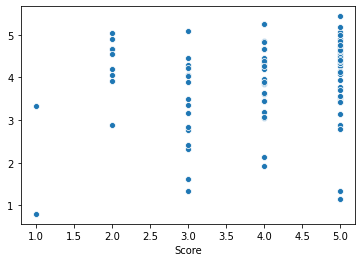

In [145]:
y_test_pred = gbr.predict(X_test)
import seaborn as sns 
sns.scatterplot(y_test, y_test_pred)

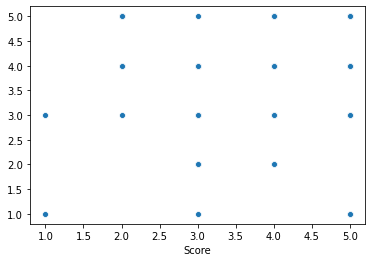

In [146]:
y_test_pred_round = np.round(y_test_pred)
sns.scatterplot(y_test, y_test_pred_round)

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred_round)

0.39603960396039606

Try again with a learning rate of 0.8 and 0.3 and compare the results.

In [0]:
# answer below:



In [0]:
from sklearn.datasets import fetch_california_housing
X1, y1 = fetch_california_housing(return_X_y = True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

In [84]:
gbr.fit(X1_train[:,0:6], y1_train)

gbr.score(X1_test[:,0:6], y1_test)


0.6499079175645336